# Matplotlib: Histograms

Histograms are great at showing the distribution of values in a given dataset.

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 1. Filter dataset

In [3]:
# Only Data Analyst positions in the United States

job_title = 'Data Analyst'
df_DA_US = df[(df['job_title_short'] == job_title) & (df['job_country'] == 'United States')].copy()

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


## 2. Build and display the Histogram

* [matplotlib.pyplot.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
    * Compute and plot a histogram.
* [matplotlib.pyplot.gca()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca)
    * Get Axis of current figure
* [matplotlib.axes.Axes.yaxis](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.yaxis.html#matplotlib.axes.Axes.yaxis)
    * Get the y axis from the figure axes
* [matplotlib.axis.Axis.set_major_formatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html#matplotlib.axis.Axis.set_major_formatter)
    * Apply a custom formatter for the given axis's major ticker
    * Major Ticker -The main ticks that mark significant intervals along an axis.
* [matplotlib.ticker.FuncFormatter()](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.FuncFormatter)
    * Supply a formatter function to format the tickers(tick marks) on an axis
    * The function should take in two inputs (a tick value <b>x</b> and a position <b>pos</b>), and return a string containing the corresponding tick label.

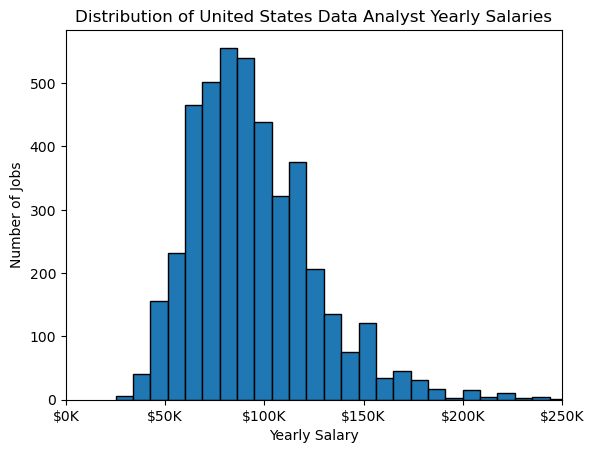

In [4]:
# Plot the Histogram based on salary year average of data analysts in the United States
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250_000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

# Problems

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Data Scientist Hourly Salaries (2.17.1) - Problem

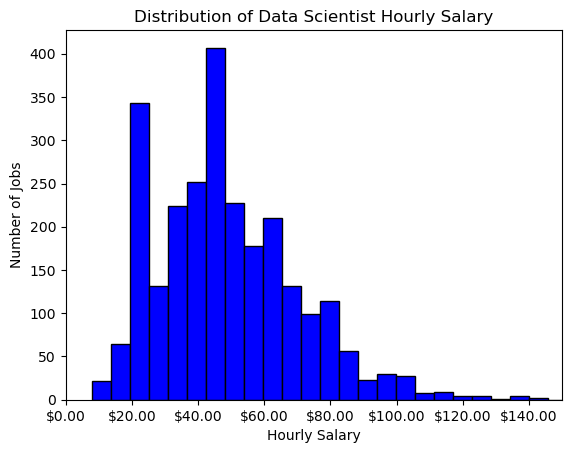

In [18]:
# Filter for Data Scientist job postings
job_title = 'Data Scientist'
df_DS = df[df['job_title_short'] == job_title].copy()

#Plot the histogram of hourly salary
df_DS['salary_hour_avg'].plot(
    kind='hist', 
    edgecolor='black', 
    bins=40, 
    color='blue'
)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.2f}'))

plt.xlim(0, 150)
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title(f'Distribution of {job_title} Hourly Salary')
plt.show()

## Job Postings by Number of Skills (2.17.2) - Problem

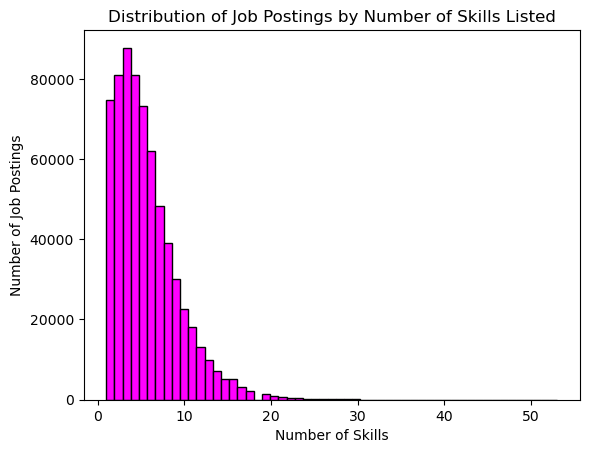

In [21]:
# Distribution of Job Postings by Number of Skills

df_skills = df[df['job_skills'].notnull()].copy()
df_skills['job_skills_count'] = df_skills['job_skills'].apply(len).rename('job_count')

df_skills['job_skills_count'].plot(
    kind='hist', 
    color='magenta', 
    edgecolor='black',
    bins=55)

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.show()

##  Data Engineer Salaries (2.17.3) - Problem

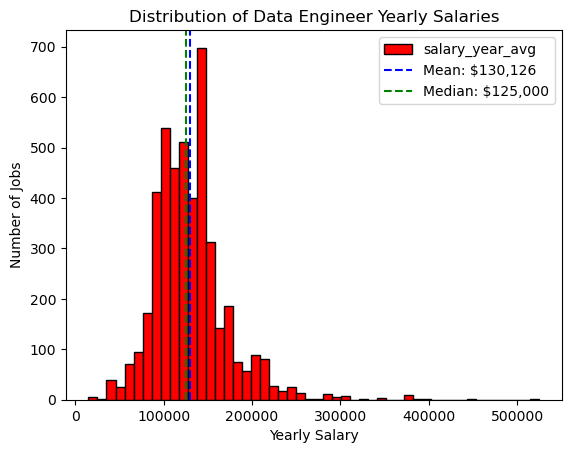

In [41]:
# Distribution of Average Yearly Salaries for Data Engineers
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

mean_salary=df_DE['salary_year_avg'].mean()
median_salary=df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(
    kind='hist',
    bins=50,
    color='red',
    edgecolor='black'
)

plt.axvline(
    x=mean_salary,
    color='blue',
    linestyle='dashed',
    label=f'Mean: ${mean_salary:,.0f}'
)

plt.axvline(
    x=median_salary,
    color='green',
    linestyle='dashed',
    label=f'Median: ${median_salary:,.0f}'
)

plt.title('Distribution of Data Engineer Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()

plt.show()